# Dynamic Programming

## Thomas Pellet

### Question 1: Solving the asset market equilibrium

#### Question 1.a: Defining the system of equations

The problem is for agent h to maximize the given two period utility:

$ U^h(c) = \nu(c_0) + \frac{1}{4} \sum^4_{s=1} \nu(c_1)$ with $\nu(c) = \frac{c^{1-\gamma}}{1-\gamma}$

with respect to the budget constraints
* At $T_0$: $e^h_0 = c^h_0 + p_1 A^{h,1} + p_2 A^{h,2}$
* At $T_1$: $e^{h,s}_1 = c^{h,s}_1 - r^{1}_s A^{h,1} + r^{2}_s A^{h,2}$

with $p_i$ the price of asset $A^i$ and $A^{h,i}$ the $A^i$ holdings of agent h.


__The first order conditions for agent h are therefore__:

* with respect to asset $A^1$: $-p_1(e^h_0 - p_1 A^{h,1} - p_2 A^{h,2})^{-\gamma} + \frac{1}{4} \sum^4_{s=1} r^1_s (e^{h,s}_1 + r^{1}_s A^{h,1} + r^{2}_s A^{h,2})^{-\gamma} = 0$

* with respect to asset $A^2$: $-p_2(e^h_0 - p_1 A^{h,1} - p_2 A^{h,2})^{-\gamma} + \frac{1}{4} \sum^4_{s=1} r^2_s (e^{h,s}_1 + r^{1}_s A^{h,1} + r^{2}_s A^{h,2})^{-\gamma} = 0$

__The market clearing conditions give us:__

* $A^{1,1} + A^{2,1} = 0$
* $A^{1,2} + A^{2,2} = 0$
since assets are in zero net supply. 

With two agents and two assets, we therefore have a non-linear system of 6 equations and 6 unknowns, namely $\{A^{1,1},A^{1,2},A^{2,1},A^{2,2},p_1,p_2\}$


In [9]:
#### Question 1.b: Solving the asset market equilibrium

import numpy as np
from scipy import optimize

def marketcondition(x,*parameters):
    A11,A12,A21,A22,p1,p2 = x
    e1,e2,r1,r2 = parameters
    return [A11 + A21, A12 + A22,  \
     -p1*(e1[0] - p1*A11 - p2*A12)**(-γ) + \
     1/4*np.sum(r1*(e1[1:] + r1*A11 + r2*A12)**(-γ)),\
     -p2*(e1[0] - p1*A11 - p2*A12)**(-γ) + \
     1/4*np.sum(r2*(e1[1:] + r1*A11 + r2*A12)**(-γ)),\
     -p1*(e2[0] - p1*A21 - p2*A22)**(-γ) + \
     1/4*np.sum(r1*(e2[1:] + r1*A21 + r2*A22)**(-γ)),\
     -p2*(e2[0] - p1*A21 - p2*A22)**(-γ) + \
     1/4*np.sum(r2*(e2[1:] + r1*A21 + r2*A22)**(-γ))]
     
     
def solvemarket(γ,e1,e2,r1,r2):
    parameters = e1,e2,r1,r2
    x = [0,0,0,0,1,1]
    solve = optimize.root(marketcondition,x, \
                          method='hybr',args=(parameters))
    
    return solve.x
    

e1 = np.array([1,1,2,1,2])
e2 = np.array([1,3,1,3,1])
r1 = np.array([1,1,1,1])
r2 = np.array([1,1,1.5,1.5])



result = np.array([])

for γ in [2.0,4.0,8.0,166.0]:
    solve = solvemarket(γ,e1,e2,r1,r2)
    print(solve)
    result = np.append(result,solve)


# print(result)

[ 1.95406655e-02  6.62332956e-12 -1.95406655e-02 -6.62332956e-12
  5.89777656e-01  7.37222070e-01]
[ 4.02982364e-03  8.96365315e-13 -4.02982364e-03 -8.96365315e-13
  5.18661303e-01  6.48326628e-01]
[ 1.56094147e-04 -2.09771742e-16 -1.56094147e-04  2.09771742e-16
  5.01014401e-01  6.26268001e-01]
[ 1.14921613e-17 -1.03393011e-17 -1.14921613e-17  1.03393011e-17
  5.00000000e-01  6.25000000e-01]


They can only trade if there are not too risk averse. When they are not risk averse, they trade asset 1 rather than asset two, because they have perfectly negatively correlated endowments. 

### Question 3: Deterministic Ramsey model

choose 


Number of iterations 	 1 
 error 	 20.058540160590752
Number of iterations 	 2 
 error 	 4.925729904293465
Number of iterations 	 3 
 error 	 3.6269611103412025
Number of iterations 	 4 
 error 	 4.303662631758543
Number of iterations 	 5 
 error 	 4.6102815348161155
Number of iterations 	 6 
 error 	 4.525971036059549
Number of iterations 	 7 
 error 	 4.276678147029369
Number of iterations 	 8 
 error 	 3.9540612759650937
Number of iterations 	 9 
 error 	 3.6058088655323792
Number of iterations 	 10 
 error 	 3.2665285817133523
Number of iterations 	 11 
 error 	 2.950461520058593
Number of iterations 	 12 
 error 	 2.6601319550020635
Number of iterations 	 13 
 error 	 2.3961925115487537
Number of iterations 	 14 
 error 	 2.1575257615124617
Number of iterations 	 15 
 error 	 1.9422001651020597
Number of iterations 	 16 
 error 	 1.7481759230928575
Number of iterations 	 17 
 error 	 1.5734526919057328
Number of iterations 	 18 
 error 	 1.4161521420360215
Number of iterations 	 1

Number of iterations 	 147 
 error 	 1.7717719309262421e-06
Number of iterations 	 148 
 error 	 1.5945947354784792e-06
Number of iterations 	 149 
 error 	 1.4351352619149306e-06
Number of iterations 	 150 
 error 	 1.2916217359777922e-06
Number of iterations 	 151 
 error 	 1.162459560304351e-06
Number of iterations 	 152 
 error 	 1.0462136034386266e-06
[-6.84851574 -6.02013529 -5.6867797  -5.44710838 -5.23240365 -5.06790219
 -4.93411775 -4.78929189 -4.66722663 -4.56166137 -4.45534411 -4.35339811
 -4.26266925 -4.18091392 -4.10649828 -4.0315036  -3.95716204 -3.88875573
 -3.8254007  -3.76567863 -3.70165409 -3.64197971 -3.5860997  -3.52803785
 -3.47121982 -3.41779609 -3.36738328 -3.3196592  -3.26839978 -3.21972299
 -3.17352638 -3.12956923 -3.0858699  -3.04095148 -2.99813193 -2.95722393
 -2.91629979 -2.87445047 -2.83441382 -2.79603953 -2.75919517 -2.72015099
 -2.68245878 -2.64623356 -2.6113656  -2.57672169 -2.54103964 -2.50666752
 -2.47351276 -2.44149223]


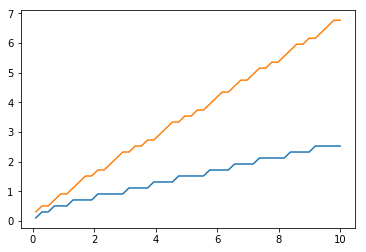

In [32]:
from matplotlib import pyplot as plt

β = 0.9
π = 0.5
grid_size = 50
maxiter = 1e6
tol = 1e-6
# Utility function
def util(x):
    if x > 0:
        return np.log(x)
    else:
        return -5000

# Production function
def prod(k,s):
    if s==1:
        return 0.9*k**(0.3) + 0.3*k
    elif s==2:
        return 1.1*k**(0.3) + 0.9*k
    

# Find Klow and Khigh
klow = 0.5
khigh = 0.5
N = 1000
for i in range(N):
    klow = prod(klow,1)
    khigh = prod(khigh,2)

# K grid
# K = np.linspace(klow,khigh,grid_size)

K = np.linspace(0.1,10,grid_size)

# Bellman operator
def T(util,prod,K,i,j,β,π,s):
    return util(prod(K[i],s) - K[j]) + β*(π*V1old[j] + π*V2old[j])

# Optimization loop

V1old = np.zeros_like(K)
V2old = np.zeros_like(K)
iter = 0
while True:
    iter += 1
    value1 = np.zeros((len(K),(len(K))))
    value2 = np.zeros((len(K),(len(K))))
    for i in range(len(K)):   # Loop over the state variable, how much is produced
        for j in range(len(K)):    # Loop over the control variable, how much you want to save
            value1[i,j] = T(util,prod,K,i,j,β,π,1)
            value2[i,j] = T(util,prod,K,i,j,β,π,2)
    V1 = np.amax(value1, axis=1) # Take the maximum value by row given state 1 production
    V2 = np.amax(value2, axis=1) # Take the 
    K1 = K[np.argmax(value1,axis=1)] # Policy function in state 1
    K2 = K[np.argmax(value2,axis=1)] # Policy function in state 2
    ϵ1 = np.linalg.norm(V1 - V1old)
    ϵ2 = np.linalg.norm(V2 - V2old)
    ϵ = ϵ1 + ϵ2
    if ϵ < tol:
        break
    V1old = V1
    V2old = V2
    print("Number of iterations","\t",iter,"\n","error","\t",ϵ)
    
print(V1)
plt.plot(K,K1)
plt.plot(K,K2)
plt.show()



### Question 4 Stochastic Ramsey model, timme iteration collocation

#### (a) Discrete shocks

To solve for the Ramsey model with time iteration, we first need to derive the Euler equation for the model. The Euler equation depends on the possible states in the following way:

$U'(f(k_t,s) - k_{t+1}^s) = \beta \frac{1}{N}\sum^S_{s=1} f'(k_{t+1},s)U'(f(k_{t+1},s) - k_{t+2,s})$

where we approximate $k_{t+2,s}$ by $PL(k_{t+1,s})$, capital saving tomorrow is approximately the value of the policy function evaluated at $k_{t+1}$ using piece wise linear interpolation. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


5000.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


Number of iterations 	 1 
 error 	 44.590412425889966


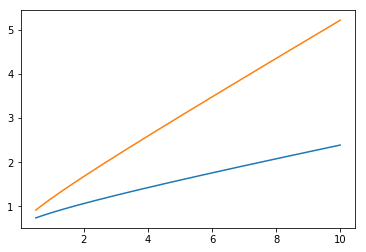

In [85]:
from matplotlib import pyplot as plt

β = 0.9
π = 0.5
grid_size = 300
maxiter = 1e6
tol = 1e-6
# Utility function
def util(x):
    return np.where(x>0, np.log(x), -5000)

def Dutil(x):
    return np.where(x>0, np.divide(1,x), 5000)

# Production function
def prod(k,s):
    if s==1:
        return 0.9*k**(0.3) + 0.3*k
    elif s==2:
        return 1.1*k**(0.3) + 0.9*k
    
def Dprod(k,s): # derivative of production function
    if s==1:
        return np.where(k>0, 0.3*0.9*np.power(k,-0.7) + 0.3, 5000)
    if s==2:
        return np.where(k>0, 0.3*1.1*np.power(k,-0.7) + 0.9, 5000)


K = np.linspace(0.5,10,grid_size)

# Interpolation function
def interpol(x,K,Kprimeold):
    return np.interp(x, K, Kprimeold)

# Euler equation
def euler(X,*parameters):
    prod,Dprod,Dutil,β,Kprimeold,K,π = parameters
    Kprimeold1 = Kprimeold[:grid_size]
    Kprimeold2 = Kprimeold[grid_size:]
    X1 = X[:grid_size]
    X2 = X[grid_size:]
    return np.append(Dutil(prod(K,1) - X1) - β*(π*Dprod(X1,1)*Dutil(prod(X1,1) \
        - interpol(X1,K,Kprimeold1)) + π*Dprod(X1,2)*Dutil(prod(X1,2) - interpol(X1,K,Kprimeold1))),
        Dutil(prod(K,2) - X2) - β*(π*Dprod(X2,1)*Dutil(prod(X2,1) \
        - interpol(X2,K,Kprimeold2)) + π*Dprod(X2,2)*Dutil(prod(X2,2) - interpol(X2,K,Kprimeold2))))

# Optimization loop
Kprimeold = np.ones(2*len(K))

iter = 0
while True:
    iter += 1
    parameters = prod,Dprod,Dutil,β,Kprimeold,K,π
    solve = optimize.root(euler,Kprimeold, method='hybr',args=(parameters))
    Kprime = solve.x
#     print(Kprime)
    ϵ=np.linalg.norm(Kprime - Kprimeold)
    if ϵ < tol:
        break
    Kprimeold = Kprime
    print("Number of iterations","\t",iter,"\n","error","\t",ϵ)


# print(Kprime)
plt.plot(K,Kprime[:grid_size])
plt.plot(K,Kprime[grid_size:])
plt.show()